In [28]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import mne
import time
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import signal


def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def string2timestamp(datetime_str):
    return time.mktime(datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S').timetuple())


def string2obj(datetime_str):
    return datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')


def obj2string(datetime_obj):
    return datetime.datetime.strftime(datetime_obj, '%Y-%m-%d %H:%M:%S')


def obj2timestamp(datetime_obj):
    datetime_str = datetime.datetime.strftime(
        datetime_obj, '%Y-%m-%d %H:%M:%S')
    return time.mktime(datetime.datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S').timetuple())


def timestamp2obj(timestamp):
    return datetime.datetime.utcfromtimestamp(timestamp-4*3600)


def timestamp2string(timestamp):
    datetime_obj = datetime.datetime.utcfromtimestamp(
        timestamp-4*3600)
    return datetime.datetime.strftime(datetime_obj, '%Y-%m-%d %H:%M:%S')


### Meditation

In [2]:
# readlines
f = open('data/test_Ganglion/OpenBCISession_Meditating4ch/OpenBCI-RAW-2023-02-27_18-48-11.txt', 'r')
line1 = f.readline()
line2 = f.readline()
line3 = f.readline()
line4 = f.readline()
num_channels = int(line2.strip().split()[-1])
print(num_channels)
sampling_frequency = int(line3.strip().split()[-2])
print(sampling_frequency)


4
200


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/2121984600.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


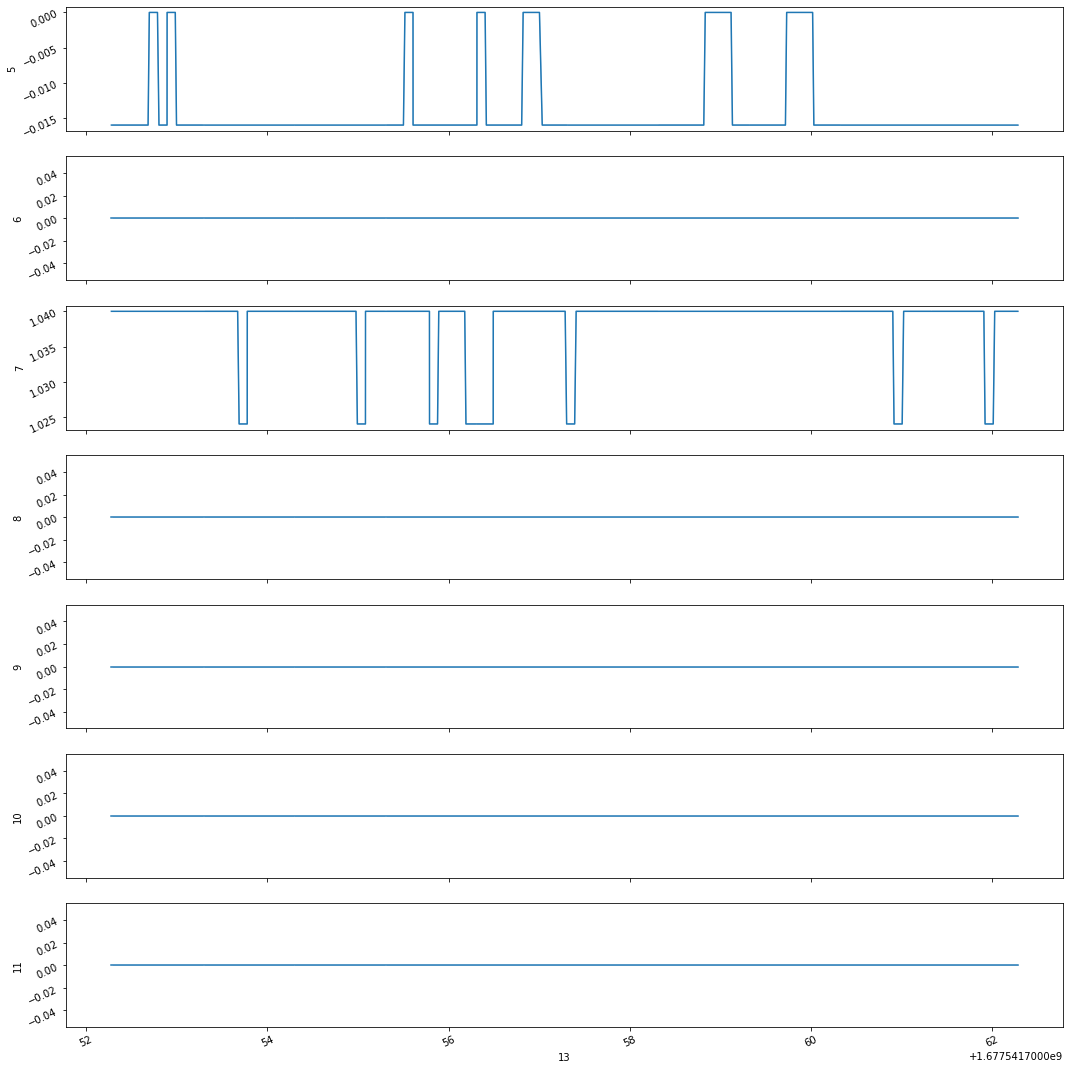

In [119]:
fig, ax = plt.subplots(7, 1,
                       figsize=(15, 15),
                       sharex=True)

for i in range(7):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x=raw_df.iloc[12060:14060, 13], y=raw_df.iloc[12060:14060, i+5],
                ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'other_inputs.png'
plt.savefig(filename)


In [2]:
raw_df = pd.read_csv(
    'data/test_Ganglion/OpenBCISession_Meditating4ch/BrainFlow-RAW_Meditating4ch_1.csv', delimiter='\t', header=None)
example_df = raw_df.iloc[:, [0,1,2,3,4,13]]
example_df.columns = ['Index_0','Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'timestamp']
example_df['timestamp'] = [timestamp2obj(t) for t in example_df['timestamp']]
example_df

/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/3189151750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_df['timestamp'] = [timestamp2obj(t) for t in example_df['timestamp']]


,Index_0,Channel_1,Channel_2,Channel_3,Channel_4,timestamp
0,0.0,-1040.369110,1346.700575,413.122439,242.066895,2023-02-27 19:48:11.977813
1,1.0,-1272.910479,1274.911325,434.443608,266.170550,2023-02-27 19:48:11.991338
2,1.0,-1238.159329,1471.674942,220.037014,119.545902,2023-02-27 19:48:11.991338
3,2.0,-1467.796666,1404.274465,105.794290,-11.234659,2023-02-27 19:48:12.008024
4,2.0,-1647.160398,1519.755096,296.420731,131.016175,2023-02-27 19:48:12.008024
...,...,...,...,...,...,...
124099,41.0,1260.615558,-622.270734,-621.354458,-726.071657,2023-02-27 19:58:32.464983
124100,42.0,1032.924839,-765.007756,-555.154489,-661.173173,2023-02-27 19:58:32.477068
124101,42.0,1001.663015,-531.948410,-499.766571,-616.384131,2023-02-27 19:58:32.477068
124102,43.0,918.614797,-509.505270,-621.691049,-724.717813,2023-02-27 19:58:32.492809


In [115]:
cyon_df = pd.read_csv(
    'data/test_S001/OpenBCISession_2022-12-01_11-22-12/BrainFlow-RAW_2022-12-01_11-22-12_0.csv', delimiter='\t', header=None)
column_numbers = list(range(0,17))
column_numbers.append(30)
column_names = ['Index_0']
for i in range(1,17):
    column_names.append('Channel_{}'.format(i))
column_names.append('timestamp')

cyon_df = cyon_df.iloc[:, column_numbers]
cyon_df.columns = column_names
cyon_df['timestamp'] = [timestamp2obj(t) for t in cyon_df['timestamp']]
cyon_df


,Index_0,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Channel_11,Channel_12,Channel_13,Channel_14,Channel_15,Channel_16,timestamp
0,0.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-88978.360770,-187500.022352,-187500.022352,-187500.022352,-93750.011176,-93750.011176,-93750.011176,-93750.011176,-93750.011176,-93750.011176,-93750.011176,-93750.011176,2022-12-01 13:09:51.275984
1,2.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-88985.602735,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,2022-12-01 13:09:51.276044
2,4.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-88993.582308,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,2022-12-01 13:09:51.276060
3,6.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-89001.360715,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,2022-12-01 13:09:51.276074
4,8.0,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-89013.855340,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,2022-12-01 13:09:51.276092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153280,138.0,33176.023743,23706.908370,31009.893836,30940.089338,-2362.266465,31635.407404,19071.290680,7030.271832,-35422.754040,-19288.504933,12619.258478,17344.774883,15414.299418,-3187.179945,-3190.175079,9205.856527,2022-12-01 13:30:14.153517
153281,140.0,33175.777873,23698.995852,31010.832609,30939.687006,-2378.203258,31621.459916,19056.784398,7028.953079,-35400.178778,-19271.182331,12610.228373,17331.475595,15412.243058,-3187.269352,-3189.839803,9205.744768,2022-12-01 13:30:14.153532
153282,142.0,33176.783702,23710.216428,31019.862714,30949.544126,-2370.313093,31637.262599,19076.252768,7029.422465,-35405.274976,-19265.661450,12604.260457,17330.022732,15408.666779,-3187.984608,-3190.756224,9204.180146,2022-12-01 13:30:14.153546
153283,144.0,33177.431903,23696.514809,31015.951159,30941.363387,-2374.850497,31631.160573,19066.976794,7026.784960,-35390.276955,-19251.691610,12612.642361,17334.068398,15402.341235,-3186.241172,-3189.191602,9205.029512,2022-12-01 13:30:14.153560


In [3]:
example_df = pd.read_csv(
    'data/test_Ganglion/OpenBCISession_Meditating4ch/BrainFlow-RAW_Meditating4ch_1.csv', delimiter='\t', header=None)
example_df = example_df.iloc[:, [0, 1, 2, 3, 4, 13]]
example_df.columns = ['Index_0', 'Channel_1',
                      'Channel_2', 'Channel_3', 'Channel_4', 'timestamp']
example_df['timestamp'] = [timestamp2obj(t) for t in example_df['timestamp']]
example_df


,Index_0,Channel_1,Channel_2,Channel_3,Channel_4,timestamp
0,0.0,-1040.369110,1346.700575,413.122439,242.066895,2023-02-27 19:48:11.977813
1,1.0,-1272.910479,1274.911325,434.443608,266.170550,2023-02-27 19:48:11.991338
2,1.0,-1238.159329,1471.674942,220.037014,119.545902,2023-02-27 19:48:11.991338
3,2.0,-1467.796666,1404.274465,105.794290,-11.234659,2023-02-27 19:48:12.008024
4,2.0,-1647.160398,1519.755096,296.420731,131.016175,2023-02-27 19:48:12.008024
...,...,...,...,...,...,...
124099,41.0,1260.615558,-622.270734,-621.354458,-726.071657,2023-02-27 19:58:32.464983
124100,42.0,1032.924839,-765.007756,-555.154489,-661.173173,2023-02-27 19:58:32.477068
124101,42.0,1001.663015,-531.948410,-499.766571,-616.384131,2023-02-27 19:58:32.477068
124102,43.0,918.614797,-509.505270,-621.691049,-724.717813,2023-02-27 19:58:32.492809


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/1475883263.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


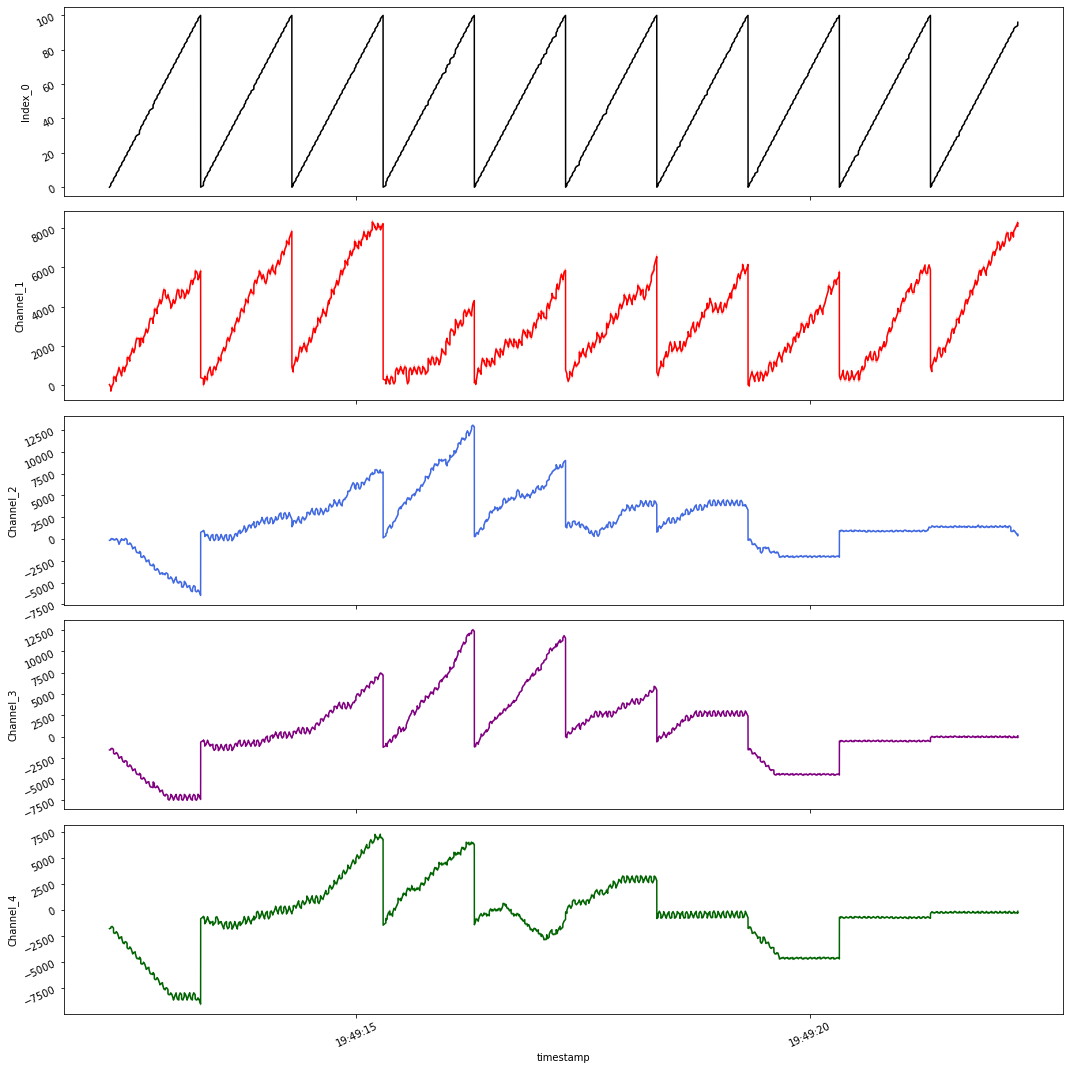

In [4]:
# df['imputed_filtered_BVP'] = hampel(df['filtered_BVP'], window_size=16, n=3, imputation=True)
import seaborn as sns
fig, ax = plt.subplots(5, 1,
                       figsize=(15, 15),
                       sharex=True)

color_list = ['black', 'red', "royalblue",
              "purple", 'darkgreen']
variable_names = ['Index_0',	'Channel_1',	'Channel_2',
		        	'Channel_3',	'Channel_4' ]

for i in range(5):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x="timestamp", y=variable_names[i],
              color=color_list[i], data=example_df.loc[12060:14060, :],
              ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_10_seconds_2.png'
plt.savefig(filename)


8 to 12 Hz are alpha

In [ ]:
from scipy import signal
low = 8
high = 12
CH1_raw = example_df.loc[12060:14060, 'Channel_1'].to_numpy()
CH2_raw = example_df.loc[12060:14060, 'Channel_2'].to_numpy()
CH3_raw = example_df.loc[12060:14060, 'Channel_3'].to_numpy()
CH4_raw = example_df.loc[12060:14060, 'Channel_4'].to_numpy()
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
filtered = signal.sosfilt(sos, CH1_raw)
filtered_df = pd.DataFrame({'Index_0': example_df.loc[12060:14060, 'Index_0'].to_numpy(),
                            'Channel_1': signal.sosfilt(sos, CH1_raw),
                            'Channel_2': signal.sosfilt(sos, CH2_raw),
                            'Channel_3': signal.sosfilt(sos, CH3_raw),
                            'Channel_4': signal.sosfilt(sos, CH4_raw),
                            'timestamp': example_df.loc[12060:14060, 'timestamp'].to_numpy()
                            })
fig, ax = plt.subplots(5, 1,
                       figsize=(15, 15),
                       sharex=True)

color_list = ['black', 'red', "royalblue",
              "purple", 'darkgreen']
variable_names = ['Index_0',	'Channel_1',	'Channel_2',
                  'Channel_3',	'Channel_4']

for i in range(5):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x="timestamp", y=variable_names[i],
              color=color_list[i], data=filtered_df,
              ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'alpha_filtered_Meditation_10_seconds.png'
plt.savefig(filename)


In [ ]:
from scipy import signal
low = 1
high = 3
CH1_raw = example_df.loc[12060:14060, 'Channel_1'].to_numpy()
CH2_raw = example_df.loc[12060:14060, 'Channel_2'].to_numpy()
CH3_raw = example_df.loc[12060:14060, 'Channel_3'].to_numpy()
CH4_raw = example_df.loc[12060:14060, 'Channel_4'].to_numpy()
low = 1
high = 3
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
filtered = signal.sosfilt(sos, CH1_raw)
filtered_df = pd.DataFrame({'Index_0': example_df.loc[12060:14060, 'Index_0'].to_numpy(),
                            'Channel_1': signal.sosfilt(sos, CH1_raw),
                            'Channel_2': signal.sosfilt(sos, CH2_raw),
                            'Channel_3': signal.sosfilt(sos, CH3_raw),
                            'Channel_4': signal.sosfilt(sos, CH4_raw),
                            'timestamp': example_df.loc[12060:14060, 'timestamp'].to_numpy()
                            })
fig, ax = plt.subplots(5, 1,
                       figsize=(15, 15),
                       sharex=True)

color_list = ['black', 'red', "royalblue",
              "purple", 'darkgreen']
variable_names = ['Index_0',	'Channel_1',	'Channel_2',
                  'Channel_3',	'Channel_4']

for i in range(5):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x="timestamp", y=variable_names[i],
              color=color_list[i], data=filtered_df,
              ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'delta_filtered_Meditation_10_seconds.png'
plt.savefig(filename)


In [32]:
example_df.loc[12060:(12060+201*10)-1, 'Index_0'].shape

(2010,)

In [5]:
def detrend_raw_signal(ts, n_epochs=None, start=0, window=201):
    if not n_epochs:
        n_epochs = ts.shape // window
    ts = ts[start:(start+n_epochs*window)]
    ts_detrended = np.zeros((n_epochs*201,))
    end = start + 200
    for i in range(n_epochs):
        start += i*201
        end = start + 200
        y = ts[(i*201):(i*201+200)]
        x = np.linspace(0, 1.0, 200)
        m, b = np.polyfit(x, y, 1)
        d = y - x*m-b
        ts_detrended[(i*201):(i*201+200)] = d
    return ts_detrended
    

In [6]:
n_epochs = 10
start=12060
window = 201
detrend_raw_signal(
    example_df.loc[:, 'Channel_1'].to_numpy(), 
    n_epochs=n_epochs,
    start=start,
    window=window).shape


(2010,)

/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/2216863596.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


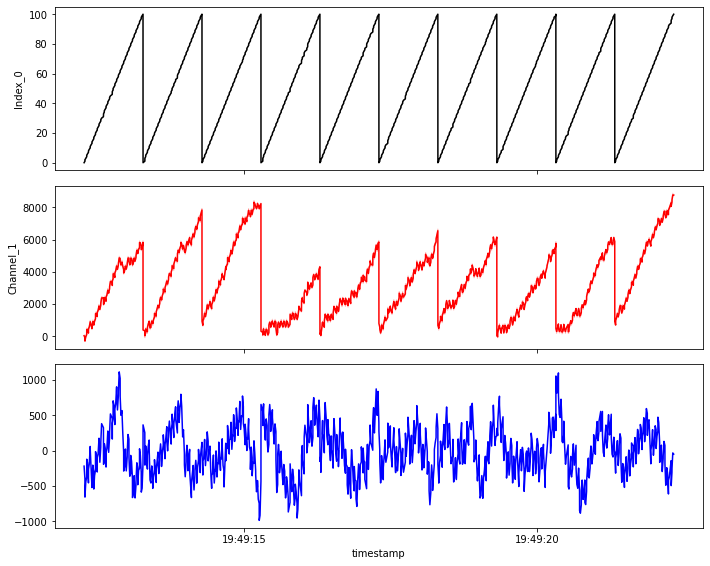

In [7]:
# 10 seconds
n_epochs = 10

detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_1'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=example_df.loc[12060:(12060+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[12060:(12060+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[12060:(12060+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[12060:(12060+201*n_epochs)-1, 'Channel_1'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[12060:(12060+201*n_epochs)-1, 'timestamp'],
             y=detrended, 
             ci=None,
             color='blue', ax=ax[2])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_1_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/3391895665.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


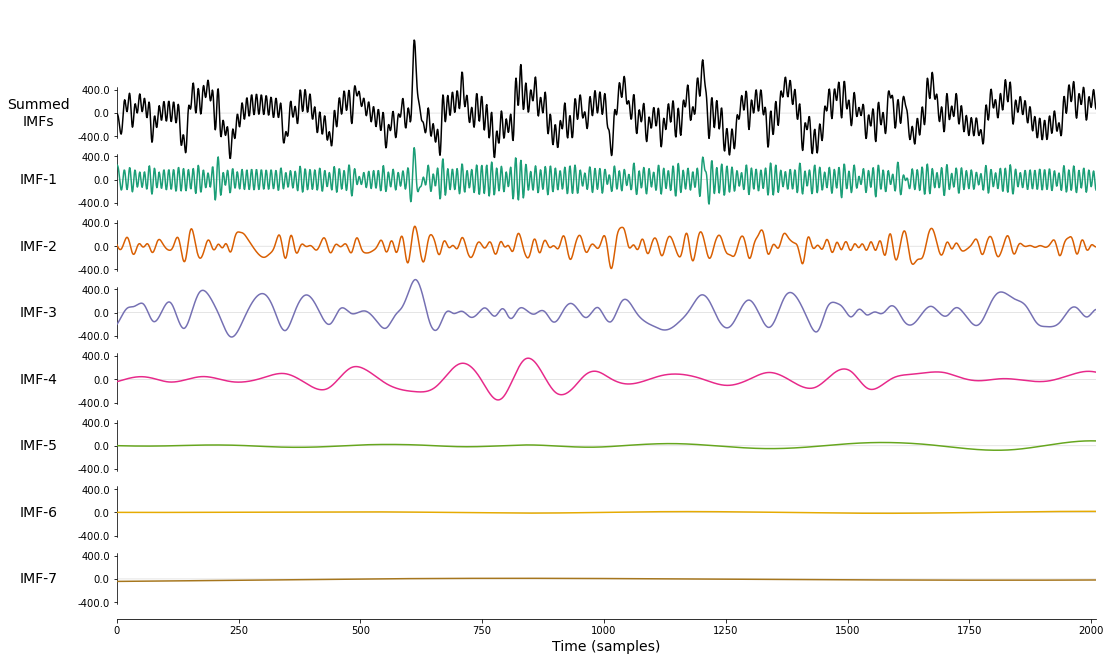

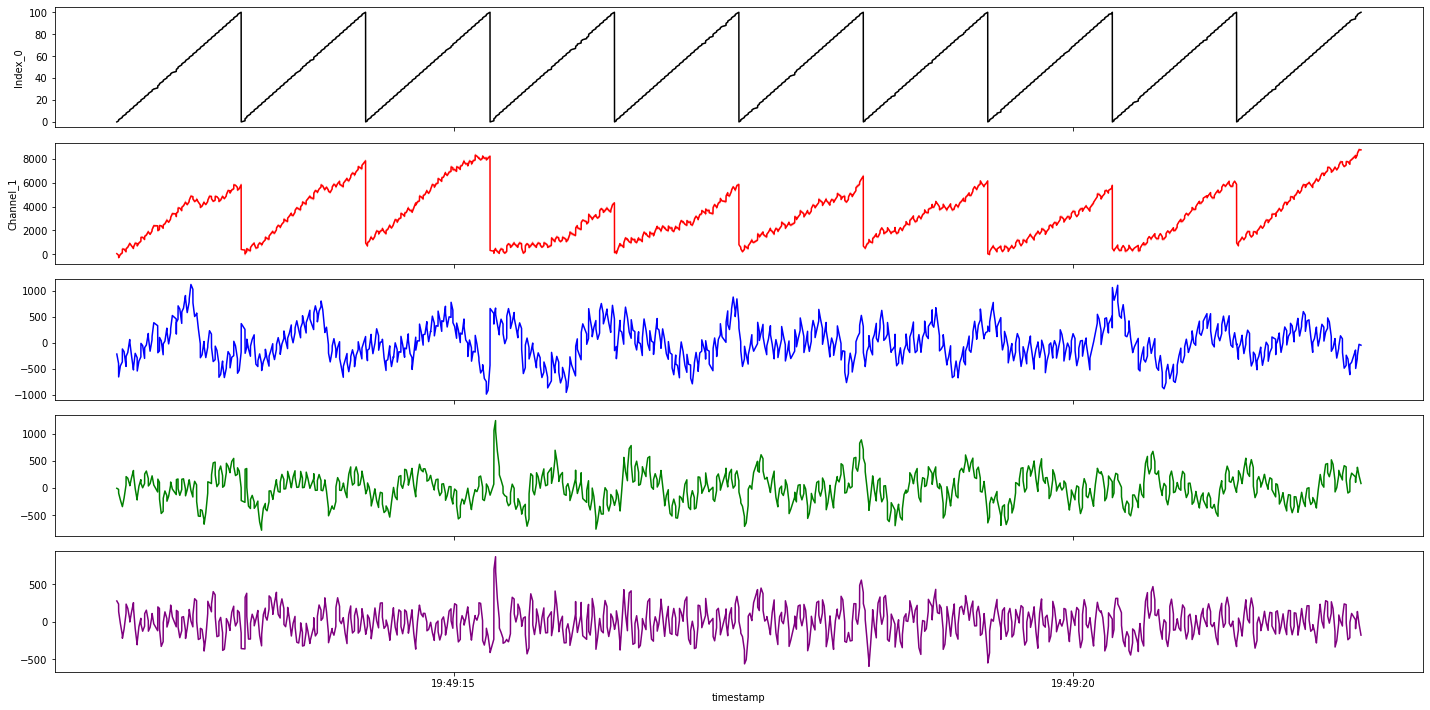

In [58]:
import emd
# 10 seconds
n_epochs = 10
start = 12060
low = 1
high = 24
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_1'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0] + imf[:, 1]

fig, ax = plt.subplots(5, 1,
                       figsize=(20, 10),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_1'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_1_IMF1_2.png'
plt.savefig(filename)


In [36]:
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
signaltonoise(reconstructed_signal)


array(-0.02316614)

/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/3691336379.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


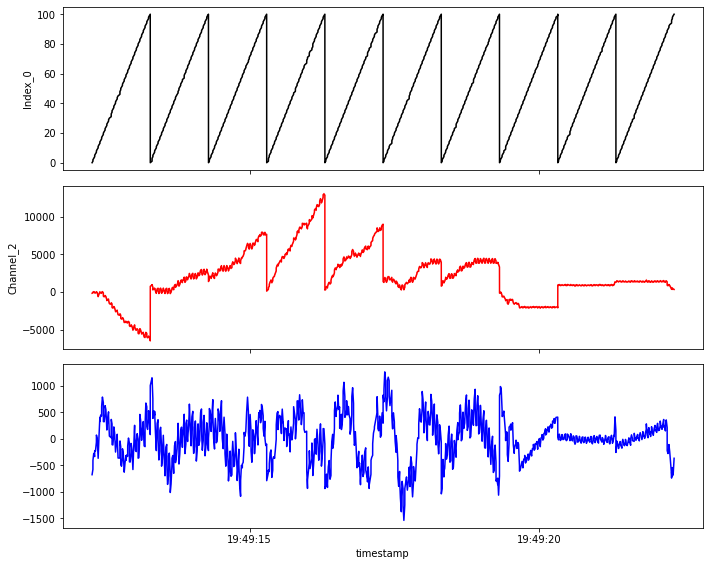

In [8]:
# 10 seconds
n_epochs = 10
start = 12060
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_2'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
                        example_df.loc[:, 'Channel_2'].to_numpy(),
                        n_epochs=n_epochs,
                        start=start,
                        window=window),
                        ci=None,
                        color='blue', ax=ax[2]
            )

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_2_detrending_comparison.png'
plt.savefig(filename)


In [59]:
import emd
# 10 seconds
n_epochs = 10
start = 12060
low = 1
high = 24
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_2'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0] + imf[:, 1]

fig, ax = plt.subplots(5, 1,
                       figsize=(20, 10),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_2'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_2_IMF1_2.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/4288637171.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


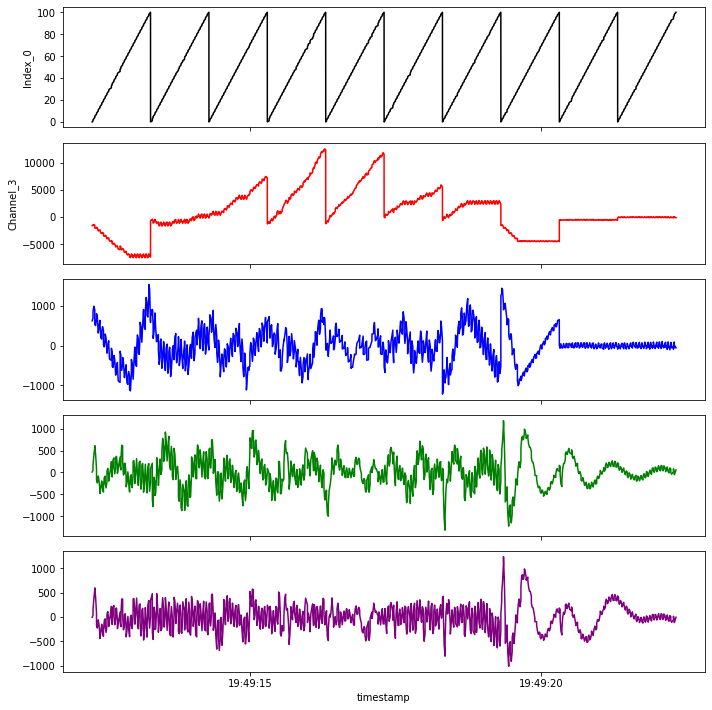

In [ ]:
import emd
# 10 seconds
n_epochs = 10
start = 12060
low = 1
high = 24
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_3'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0] + imf[:, 1]

fig, ax = plt.subplots(5, 1,
                       figsize=(20, 10),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_3'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
            ci=None,
            color='green', ax=ax[3])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_3_IMF1_2.png'
plt.savefig(filename)


<AxesSubplot:xlabel='Time (samples)'>

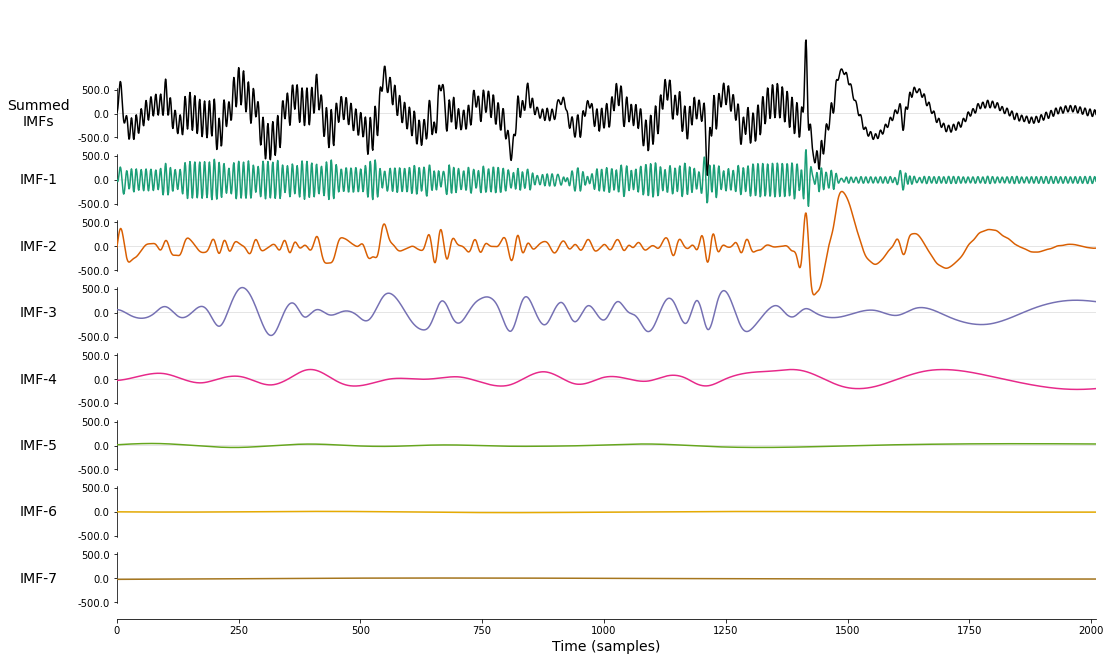

In [14]:
import emd
sample_rate = 200
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_3'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)


In [12]:
reconstructed_signal = imf[:,0]+imf[:,1]+imf[:,4]+imf[:,5]
reconstructed_signal


array([-197.09651261, -188.9926973 , -108.92920886, ...,  -80.43935506,
        -77.31550516,   22.77386167])

/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/2675159690.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


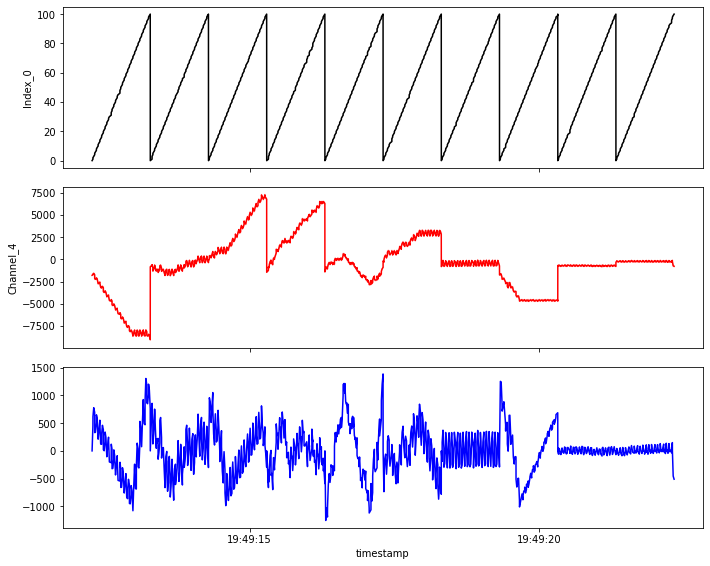

In [99]:
# 10 seconds
n_epochs = 10
start = 12060
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_4'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
    example_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window),
    ci=None,
    color='blue', ax=ax[2])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_4_detrending_comparison.png'
plt.savefig(filename)


0.017903802592856247


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/4030550571.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


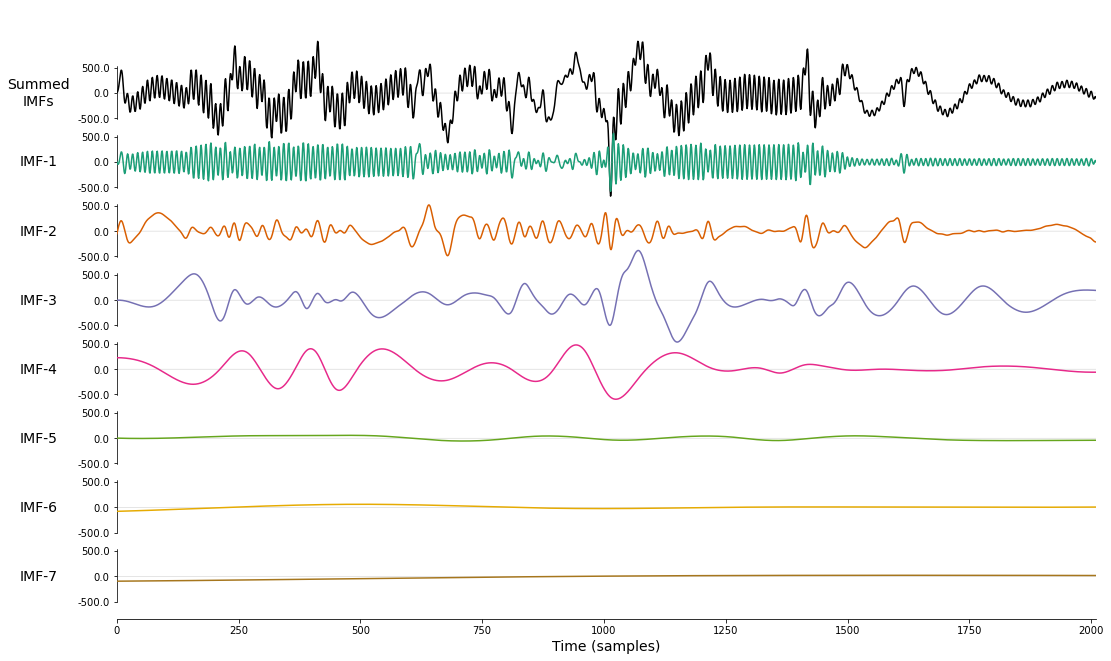

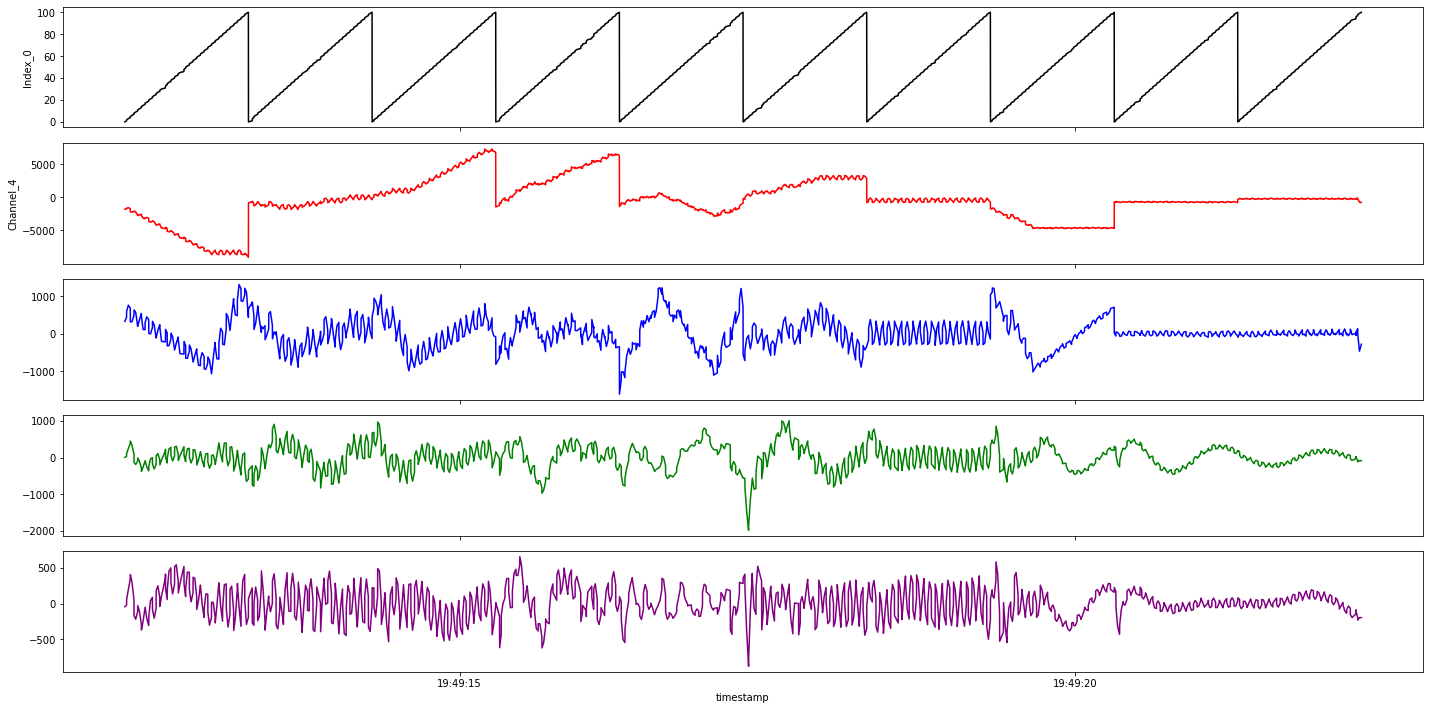

In [55]:
import emd
# 10 seconds
n_epochs = 10
start=12060
low = 1
high = 24
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    example_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0] + imf[:, 1]
print(signaltonoise(reconstructed_signal))

fig, ax = plt.subplots(5, 1,
                       figsize=(20, 10),
                       sharex=True)
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)
                              - 1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=example_df.loc[start:(start+201*n_epochs)-1, 'Channel_4'],
             color='red', ax=ax[1])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=example_df.loc[start:(start+201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Meditation_Channel_4_IMF1_2.png'
plt.savefig(filename)




### No contact

In [20]:
null_df = pd.read_csv(
    'data/test_Ganglion/OpenBCISession_Noskin4ch/BrainFlow-RAW_Noskin4ch_0.csv', delimiter='\t', header=None)
null_df = null_df.iloc[:, [0, 1, 2, 3, 4, 13]]
null_df.columns = ['Index_0', 'Channel_1',
                      'Channel_2', 'Channel_3', 'Channel_4', 'timestamp']
null_df['timestamp'] = [timestamp2obj(t) for t in null_df['timestamp']]
null_df


,Index_0,Channel_1,Channel_2,Channel_3,Channel_4,timestamp
0,2.0,-18.620962,-120.718361,201.049542,-54.948480,2023-02-27 20:02:39.590328
1,2.0,-113.171243,-122.958561,213.699753,76.443555,2023-02-27 20:02:39.590328
2,3.0,5.998800,-125.129573,285.457214,161.313105,2023-02-27 20:02:39.604543
3,3.0,222.142578,-367.729403,291.326987,299.130288,2023-02-27 20:02:39.604543
4,4.0,376.779961,-384.831966,509.727795,244.415552,2023-02-27 20:02:39.605219
...,...,...,...,...,...,...
122375,85.0,-894.228779,6872.911386,2608.488592,7623.161496,2023-02-27 20:12:51.449735
122376,86.0,-650.484539,6759.618597,2399.667538,7562.017872,2023-02-27 20:12:51.465296
122377,86.0,-618.715959,6638.963814,2371.747314,7692.050454,2023-02-27 20:12:51.465296
122378,87.0,-730.307094,6759.994457,2323.414717,7845.390092,2023-02-27 20:12:51.466084


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/582364426.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


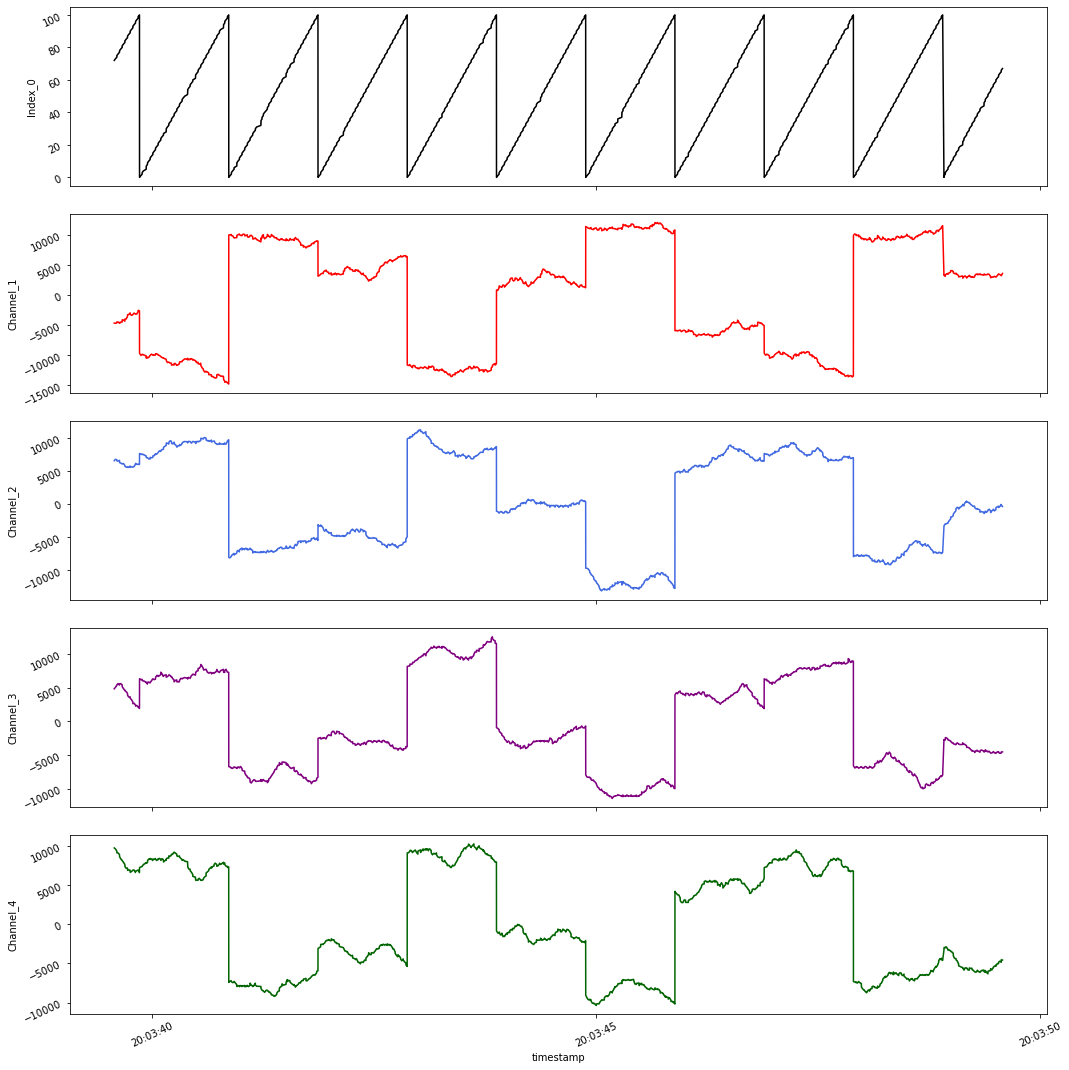

In [10]:
# df['imputed_filtered_BVP'] = hampel(df['filtered_BVP'], window_size=16, n=3, imputation=True)
import seaborn as sns
fig, ax = plt.subplots(5, 1,
                       figsize=(15, 15),
                       sharex=True)

color_list = ['black', 'red', "royalblue",
              "purple", 'darkgreen']
variable_names = ['Index_0',	'Channel_1',	'Channel_2',
                  'Channel_3',	'Channel_4']

for i in range(5):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x="timestamp", y=variable_names[i],
              color=color_list[i], data=null_df.loc[12000:14000, :],
              ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_10_seconds_2.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/3334784909.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


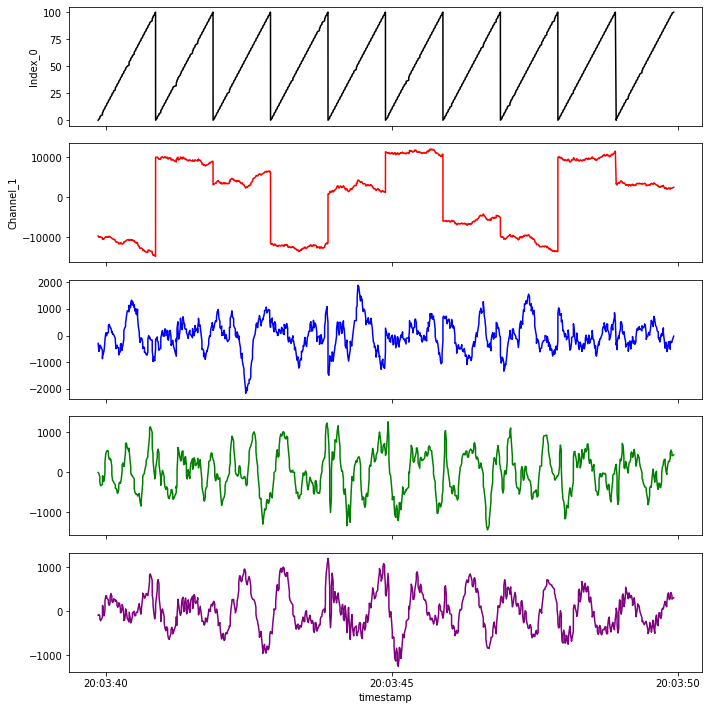

In [24]:
import emd
# 10 seconds
n_epochs = 10
low = 1
high = 24
start = 12057
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_1'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]

fig, ax = plt.subplots(5, 1,
                       figsize=(10, 10),
                       sharex=True)
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)
                              - 1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Channel_1'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_1_detrending_comparison_signal.png'
plt.savefig(filename)


In [30]:
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_1'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
signaltonoise(reconstructed_signal)


array(0.04058797)

-0.006116863331449548


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/3293414773.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


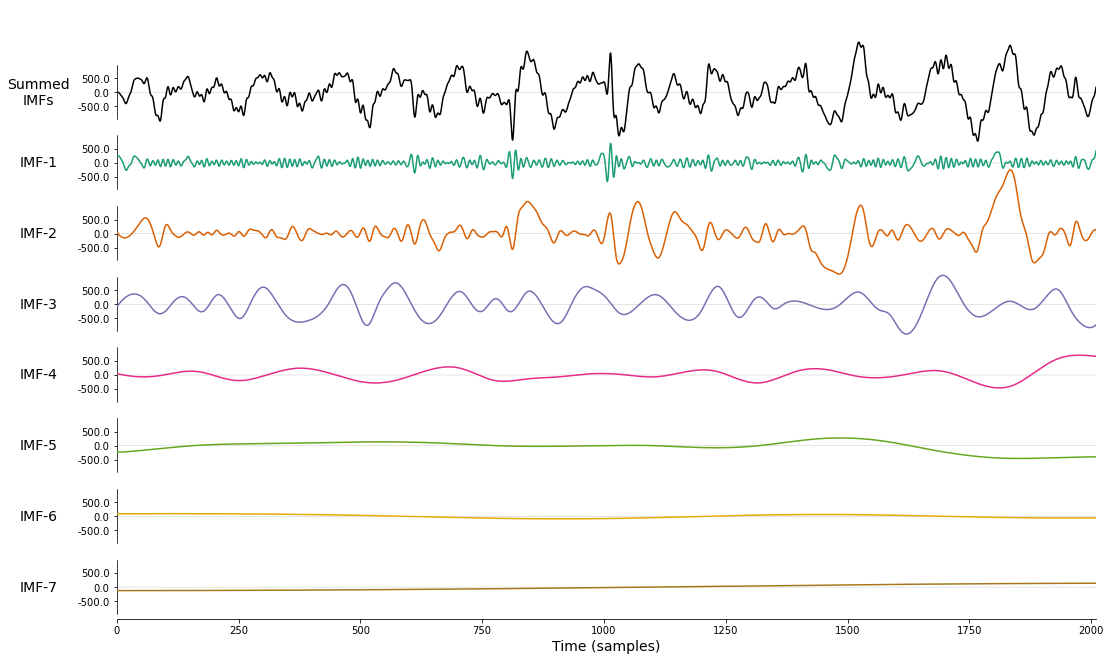

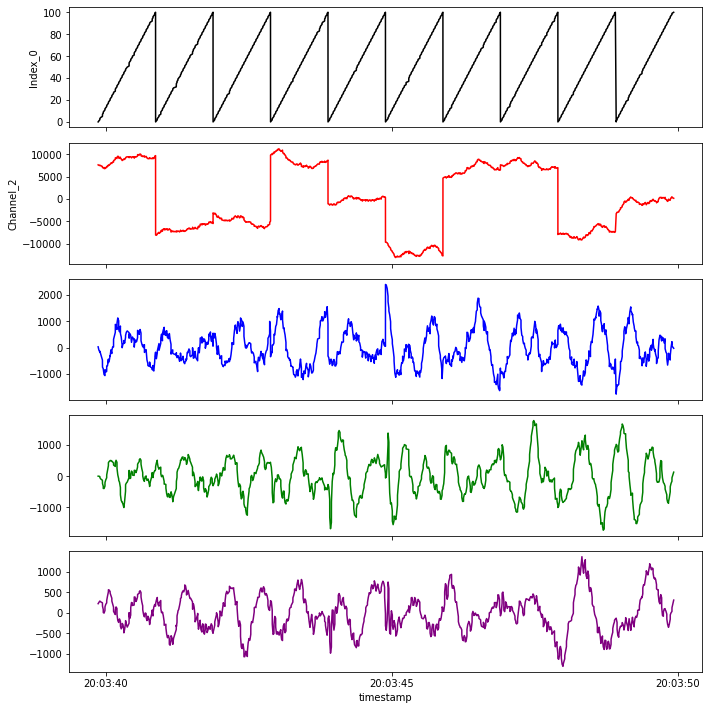

In [42]:
import emd
# 10 seconds
n_epochs = 10
low = 1
high = 24
start = 12057
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_2'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
print(signaltonoise(reconstructed_signal))
fig, ax = plt.subplots(5, 1,
                       figsize=(10, 10),
                       sharex=True)
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Channel_2'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_2_detrending_comparison.png'
plt.savefig(filename)


In [33]:
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
signaltonoise(reconstructed_signal)


array(-0.01014741)

0.041725181195192876


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/2433734513.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


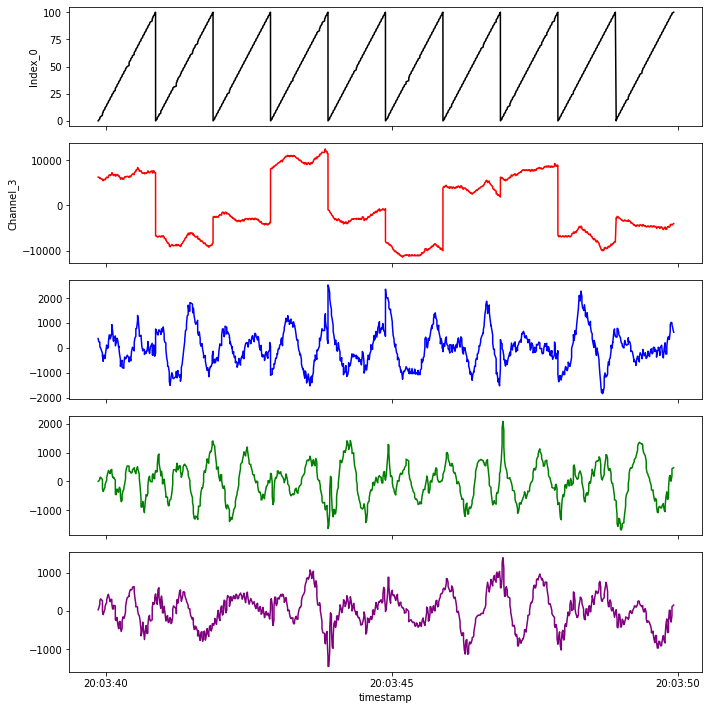

In [43]:
import emd
# 10 seconds
n_epochs = 10
low = 1
high = 24
start = 12057
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_3'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
print(signaltonoise(reconstructed_signal))
fig, ax = plt.subplots(5, 1,
                       figsize=(10, 10),
                       sharex=True)
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Channel_3'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_3_detrending_comparison.png'
plt.savefig(filename)


-0.010147410938547685


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_2348/1460565905.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


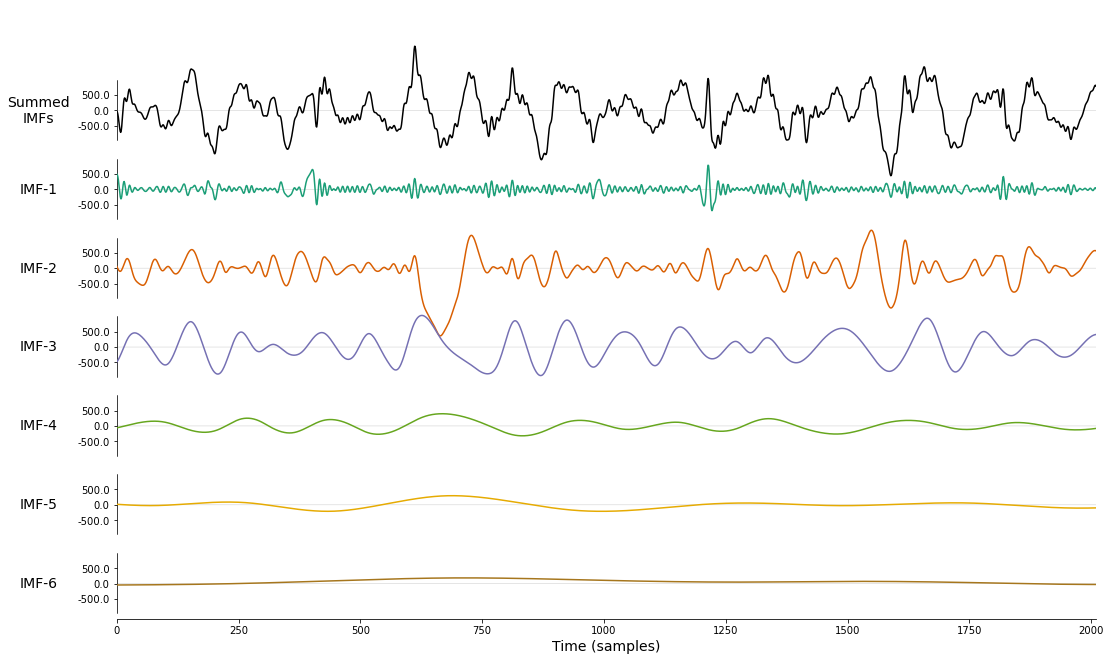

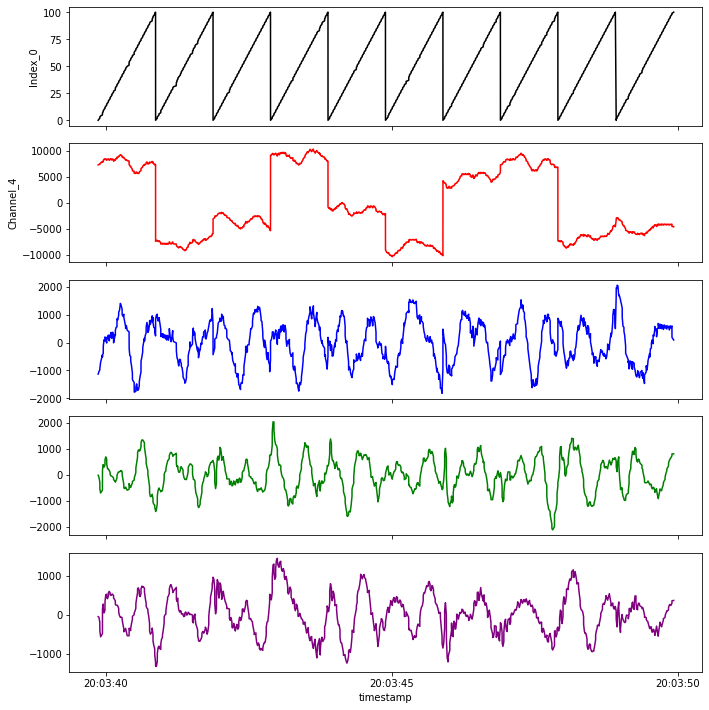

In [44]:
import emd
# 10 seconds
n_epochs = 10
low = 1
high = 24
start = 12057
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
detrended = detrend_raw_signal(
    null_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window)
filtered_detrended = signal.sosfilt(sos, detrended)
imf = emd.sift.sift(filtered_detrended)
emd.plotting.plot_imfs(imf)
reconstructed_signal = imf[:, 0]+imf[:, 2]+imf[:, 3]
print(signaltonoise(reconstructed_signal))

fig, ax = plt.subplots(5, 1,
                       figsize=(10, 10),
                       sharex=True)
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[start:(start + 201*n_epochs)-1, 'Channel_4'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=detrended,
             ci=None,
             color='blue', ax=ax[2])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=filtered_detrended,
             ci=None,
             color='green', ax=ax[3])
sns.lineplot(x=null_df.loc[start:(start + 201*n_epochs)-1, 'timestamp'],
             y=reconstructed_signal,
             ci=None,
             color='purple', ax=ax[4])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_4_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/1143687947.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


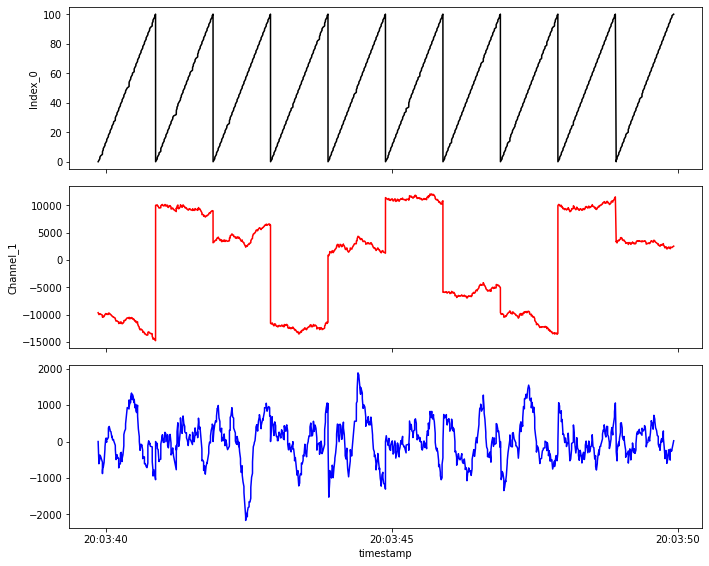

In [101]:
# 10 seconds
n_epochs = 10
start = 12057
window=201
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)
                              - 1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Channel_1'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
    null_df.loc[:, 'Channel_1'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window),
    ci=None,
    color='blue', ax=ax[2])

# ax[2].set_ylim(bottom=-1000, top=1000)

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_1_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/344070850.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


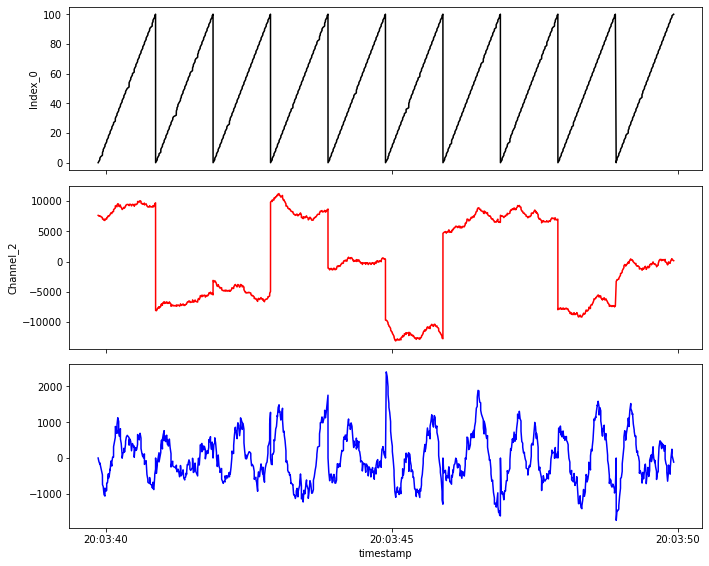

In [102]:
# 10 seconds
n_epochs = 10
start = 12057
window = 201
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Channel_2'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
    null_df.loc[:, 'Channel_2'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window),
    ci=None,
    color='blue', ax=ax[2])

# ax[2].set_ylim(bottom=-1000, top=1000)

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_2_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/2764658045.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


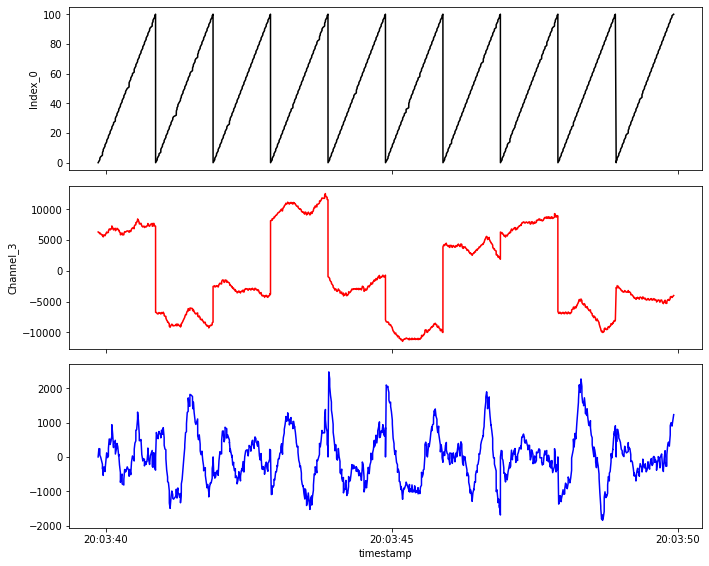

In [103]:
# 10 seconds
n_epochs = 10
start = 12057
window = 201
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Channel_3'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
    null_df.loc[:, 'Channel_3'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window),
    ci=None,
    color='blue', ax=ax[2])

# ax[2].set_ylim(bottom=-1000, top=1000)

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_3_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/1506319539.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


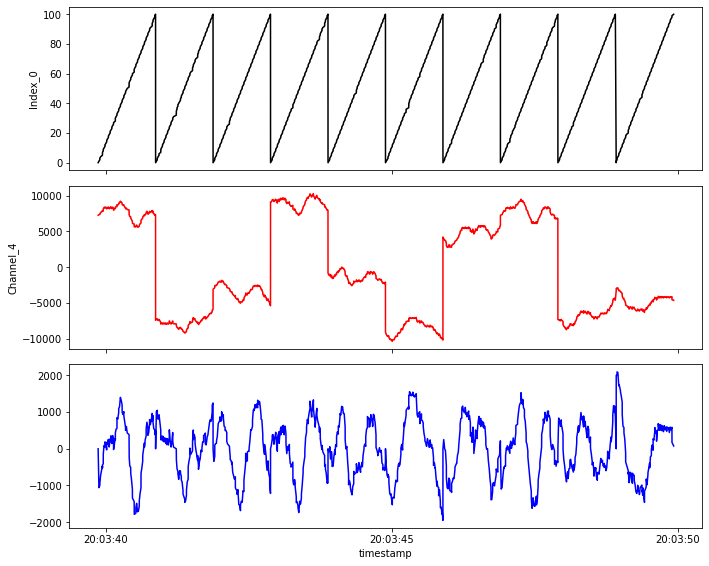

In [104]:
# 10 seconds
n_epochs = 10
start = 12057
window = 201
fig, ax = plt.subplots(3, 1,
                       figsize=(10, 8),
                       sharex=True)
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)
                           - 1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=null_df.loc[12057:(12057+201*n_epochs)-1, 'Channel_4'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[12057:(12057+201*n_epochs)-1, 'timestamp'],
             y=detrend_raw_signal(
    null_df.loc[:, 'Channel_4'].to_numpy(),
    n_epochs=n_epochs,
    start=start,
    window=window),
    ci=None,
    color='blue', ax=ax[2])

# ax[2].set_ylim(bottom=-1000, top=1000)

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_4_detrending_comparison.png'
plt.savefig(filename)


In [45]:
np.where(null_df.loc[12000:14000,'Index_0']==0)

(array([  57,  258,  459,  660,  861, 1062, 1263, 1464, 1665, 1866]),)

In [ ]:
# 10 seconds

### 1-second detrending
CH1_detrended = np.empty((10*201,))
start = 12060
end = start + 200
for i in range(10):
    start += i*201
    end = start + 200
    x = null_df.loc[start:end, 'Channel_1'].to_numpy()
    t = null_df.loc[start:end, 'Channel_1'].to_numpy()
    m, b = np.polyfit(x, t, 1)
    d = x - x*m-b
    CH1_detrended[(i*201):(i*201+201)] = d

fig, ax = plt.subplots(3, 1,
                       figsize=(15, 10),
                       sharex=True)
sns.lineplot(x=null_df.loc[12060:(12060+201*10)-1, 'timestamp'],
             y=null_df.loc[12060:(12060+201*10)-1, 'Index_0'],
             color='black', ax=ax[0])
sns.lineplot(x=null_df.loc[12060:(12060+201*10)-1, 'timestamp'],
             y=null_df.loc[12060:(12060+201*10)-1, 'Channel_1'],
             color='red', ax=ax[1])
sns.lineplot(x=null_df.loc[12060:(12060+201*10)-1, 'timestamp'],
             y=CH1_detrended,
             color='blue', ax=ax[2])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'Null_Channel_1_detrending_comparison.png'
plt.savefig(filename)


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_93065/2743353526.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


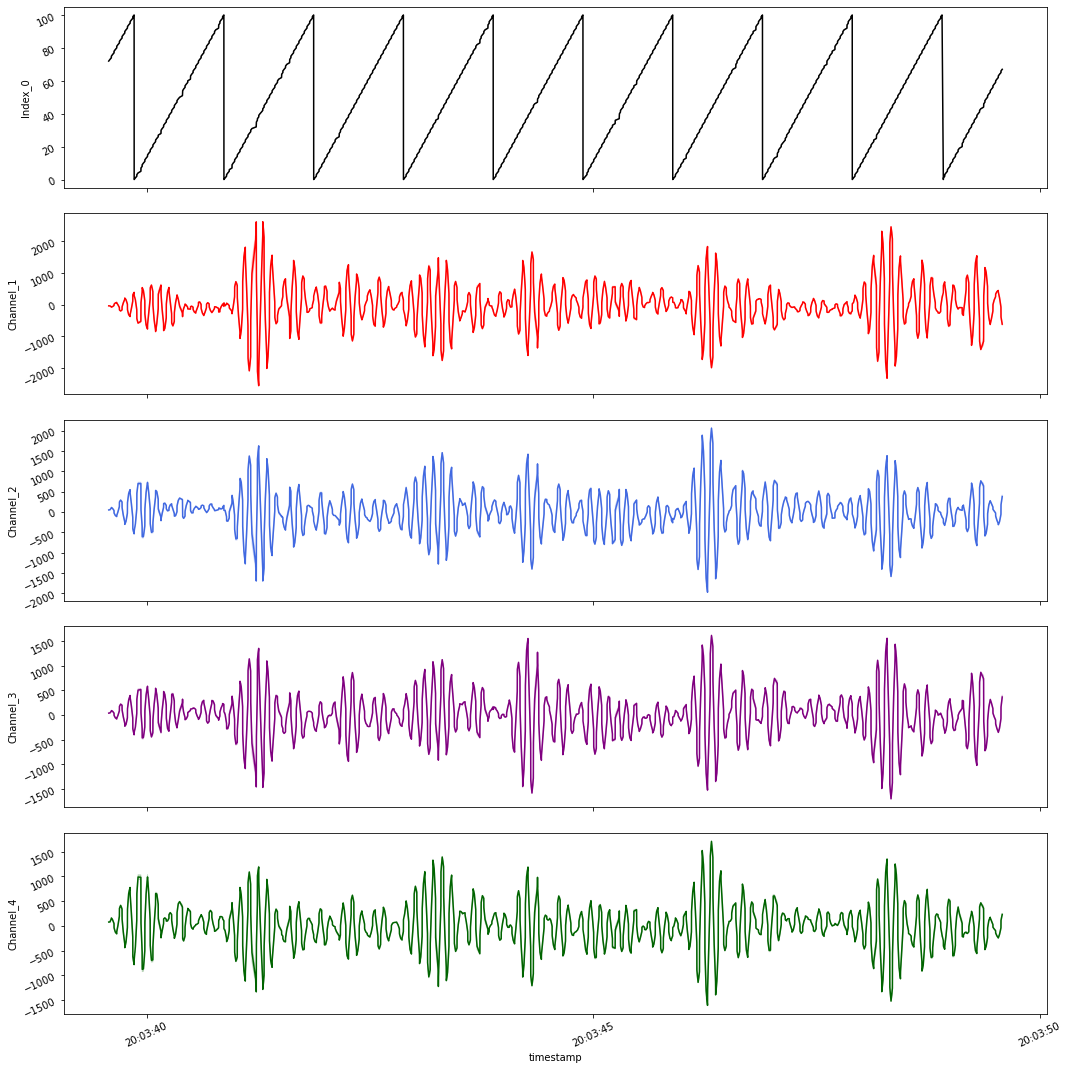

In [11]:
from scipy import signal
low = 8
high = 12
CH1_raw = null_df.loc[12000:14000, 'Channel_1'].to_numpy()
CH2_raw = null_df.loc[12000:14000, 'Channel_2'].to_numpy()
CH3_raw = null_df.loc[12000:14000, 'Channel_3'].to_numpy()
CH4_raw = null_df.loc[12000:14000, 'Channel_4'].to_numpy()
sos = signal.cheby2(N=10,
                    rs=40,
                    Wn=[low, high],
                    btype='bandpass',
                    fs=200,
                    output='sos')
null_filtered_df = pd.DataFrame({'Index_0': null_df.loc[12000:14000, 'Index_0'].to_numpy(),
                            'Channel_1': signal.sosfilt(sos, CH1_raw),
                            'Channel_2': signal.sosfilt(sos, CH2_raw),
                            'Channel_3': signal.sosfilt(sos, CH3_raw),
                            'Channel_4': signal.sosfilt(sos, CH4_raw),
                                 'timestamp': null_df.loc[12000:14000, 'timestamp'].to_numpy()
                            })
fig, ax = plt.subplots(5, 1,
                       figsize=(15, 15),
                       sharex=True)

color_list = ['black', 'red', "royalblue",
              "purple", 'darkgreen']
variable_names = ['Index_0',	'Channel_1',	'Channel_2',
                  'Channel_3', 'Channel_4']

for i in range(5):
	ax[i].tick_params(labelrotation=25)
	sns.lineplot(x="timestamp", y=variable_names[i],
              color=color_list[i], data=null_filtered_df,
              ax=ax[i])

fig.tight_layout(pad=1.2)
fig.show()
filename = 'alpha_filtered_Null_10_seconds.png'
plt.savefig(filename)


# Older example codes

In [ ]:
bads, info = nk.eeg_badchannels(eeg, distance_threshold=0.95, show=False)

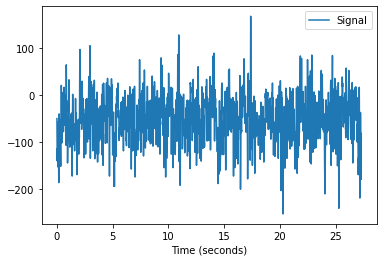

In [6]:
eeg = nk.data(dataset="eeg")
nk.signal_plot(eeg, sampling_rate=150)

In [15]:
import pickle
with open('eeg_1min_200hz.pickle', 'rb') as pickle_file:
    raw = pickle.load(pickle_file)
raw.info

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 1 items (EEG 053)
 ch_names: STI 001, STI 002, STI 003, STI 004, STI 005, STI 006, STI 014, ...
 chs: 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 100.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 70
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 200.0 Hz
>

In [19]:
print(type(raw._data))
print(raw._data.shape)
scan_durn = raw._data.shape[1] / raw.info['sfreq']
print('Duration of EEG recording = ', scan_durn,
      's, or', scan_durn / 60, 'min.')

<class 'numpy.ndarray'>
(70, 12000)
Duration of EEG recording =  60.0 s, or 1.0 min.


/var/folders/j_/3nq1pt5x6yqcx3k5d68vn4mc0000gq/T/ipykernel_19503/3611353603.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


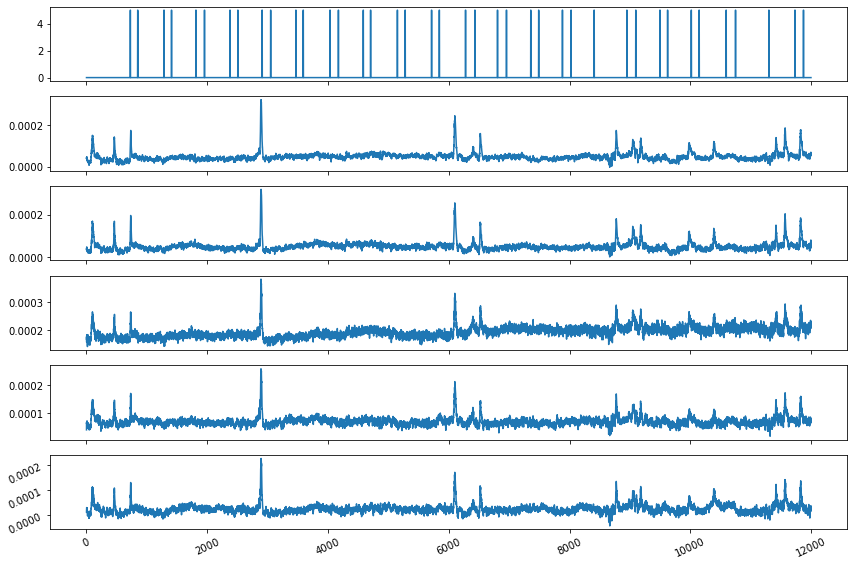

In [28]:
import seaborn as sns
stimulus = raw._data[1, :]
eeg1 = raw._data[10, :]
eeg2 = raw._data[11, :]
eeg3 = raw._data[12, :]
eeg4 = raw._data[13, :]
eeg5 = raw._data[14, :]

eog = raw._data[69, :]

# Plot PPG
# create the time series subplots
fig,ax = plt.subplots( 6, 1,
					figsize = ( 12, 8),
					sharex = True)

x = np.arange(0,raw._data.shape[1])


ax[-1].tick_params(labelrotation = 25)
sns.lineplot( x = x, y = stimulus, ax = ax[0])
sns.lineplot( x = x, y = eeg1, ax = ax[1])
sns.lineplot( x = x, y = eeg2, ax = ax[2])
sns.lineplot( x = x, y = eeg3, ax = ax[3])
sns.lineplot( x = x, y = eeg4, ax = ax[4])
sns.lineplot( x = x, y = eeg5, ax = ax[5])


fig.tight_layout(pad = 1.2)
fig.show()


### Empirical Mode Decomposition and Wavelet Transform

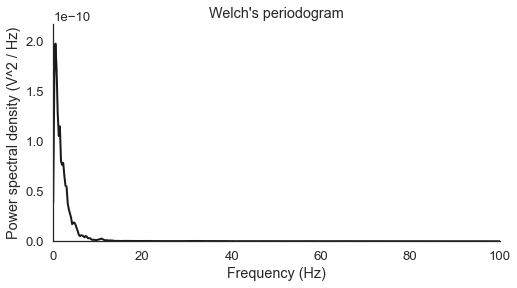

In [29]:
data = eeg1
sf = 200
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()


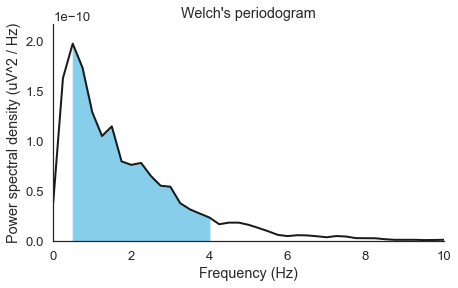

In [30]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()


* delta (1–3 Hz)
* theta (4–7 Hz)
* alpha (8–12 Hz)
* beta (13–30 Hz)
* gamma (30–100 Hz)

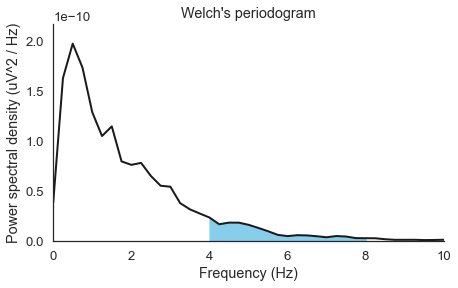

In [31]:
# Define theta lower and upper limits
low, high = 4, 8

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

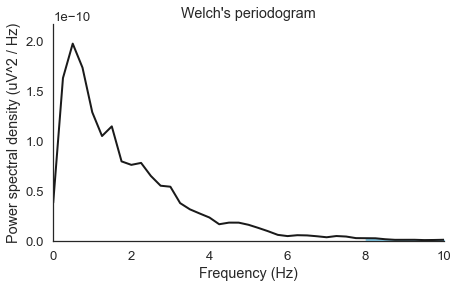

In [32]:
# Define alpha lower and upper limits
low, high = 8, 12

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()

In [ ]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """Compute the average power of the signal x in a specific frequency band.

    Parameters
    ----------
    data : 1d-array
        Input signal in the time-domain.
    sf : float
        Sampling frequency of the data.
    band : list
        Lower and upper frequencies of the band of interest.
    window_sec : float
        Length of each window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative : boolean
        If True, return the relative power (= divided by the total power of the signal).
        If False (default), return the absolute power.

    Return
    ------
    bp : float
        Absolute or relative band power.
    """
    from scipy.signal import welch
    from scipy.integrate import simps
    band = np.asarray(band)
    low, high = band

    # Define window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp
